## class PCA

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class PCA:
    
    def __init__(self, n_components):
        assert n_components >= 1, "n_components >= 1"
        self.n_components = n_components
        self.components_ = None
        
    def __repr__(self):
        return "PCA(n_components=%d):" % self.n_components
    
    def fit(self, X, eta=0.01, n_iters=1e4):
        assert self.n_components <= X.shape[1], "n_components <= X.shape[1]"
        
        def demean(X):
            return X - np.mean(X, axis=0)  # np.mean(X, axis=0) 为 1 * n 矩阵
        
        def f(w, X):
            return np.sum((X.dot(w)**2)) / len(X)
        
        def df(w, X):
            return X.T.dot(X.dot(w)) * 2. / len(X)
        
        def direction(w):
            return w / np.linalg.norm(w)    # np.linalg.norm(w) 求w的模长
        
        def first_component(X, init_w, eta, n_iters=1e4, epsilon=1e-8):

            cur_iter = 0
            w = direction(init_w)

            while cur_iter < n_iters:
                gradient = df(w, X)
                last_w = w
                w = w + eta * gradient
                w = direction(w)                                 # 注意1：每次求一个单位向量

                if (abs(f(w, X) - f(last_w, X)) < epsilon):
                    break
                cur_iter += 1

            return w
        
        X_pca = demean(X)
        self.components_ = np.empty(shape=(self.n_components, X.shape[1]))
        
        for i in range(self.n_components):
            init_w = np.random.random(X_pca.shape[1])
            w = first_component(X_pca, init_w, eta, n_iters)
            self.components_[i, :] = w
            
            X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        return self
    
    def transform(self, X):
        assert X.shape[1] == self.components_.shape[1], "X.shape"
        
        return X.dot(self.components_.T)
    
    def inverse_transform(self, X):
        assert X.shape[1] == self.components_.shape[0], "X.shape"
        
        return X.dot(self.components_)
        

In [6]:
X = np.empty((100, 2))

X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [7]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2):

In [8]:
pca.components_

array([[ 0.76380936,  0.64544191],
       [ 0.64544484, -0.76380688]])

In [9]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1):

In [10]:
pca.components_

array([[0.76380935, 0.64544192]])

In [11]:
X_reduction = pca.transform(X)

In [13]:
X_reduction[:10, :]

array([[ 24.5199128 ],
       [ 69.56382677],
       [  7.99953277],
       [ 71.66151816],
       [ 30.51800222],
       [ 82.52228712],
       [116.79224024],
       [ 66.00304166],
       [ 38.55559484],
       [ 84.55644498]])

In [14]:
X[:10, :]

array([[19.17548939, 15.29726277],
       [54.85105867, 42.86687041],
       [ 2.85225905,  9.01855061],
       [59.29114369, 40.86252729],
       [20.13776907, 23.4515072 ],
       [61.32648819, 55.28079404],
       [86.9611524 , 78.04032727],
       [53.06655727, 39.46181383],
       [30.83079172, 23.25034569],
       [73.06942348, 44.53589866]])

In [15]:
X_restors = pca.inverse_transform(X_reduction)

In [17]:
X_restors[:10, :]

array([[18.72853869, 15.82617965],
       [53.13350141, 44.89941006],
       [ 6.11011794,  5.16323381],
       [54.7357377 , 46.25334801],
       [23.30993548, 19.69759801],
       [63.0312946 , 53.26334361],
       [89.20700527, 75.38260802],
       [50.41374044, 42.60113007],
       [29.44912389, 24.88539724],
       [64.5850034 , 54.57627437]])

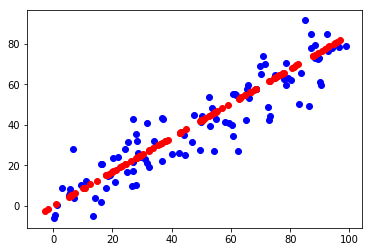

In [18]:
plt.scatter(X[:,0], X[:,1], color='b')
plt.scatter(X_restors[:,0], X_restors[:,1], color='r')
plt.show()

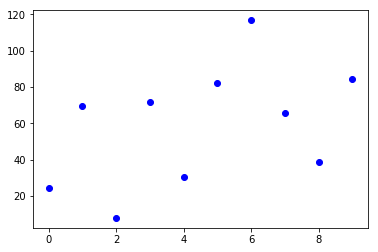

In [28]:
plt.scatter(range(0,len(X_reduction[:10])),X_reduction[:10], color='b')
plt.show()

### sklearn 中的PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
pca.components_

array([[-0.76380931, -0.64544197]])

In [32]:
X_reduction = pca.transform(X)

In [33]:
X_reduction[:10,:]

array([[ 38.62521551],
       [ -6.41869834],
       [ 55.14559516],
       [ -8.51638943],
       [ 32.62712572],
       [-19.37715903],
       [-53.64711221],
       [ -2.85791312],
       [ 24.58953356],
       [-21.41131585]])

In [34]:
X_restors = pca.inverse_transform(X_reduction)

In [35]:
X_restors[:10, :]

array([[19.54501493, 14.8599701 ],
       [53.94997563, 43.9332027 ],
       [ 6.92659516,  4.19702367],
       [55.55221161, 45.28714058],
       [24.12641174, 18.73138901],
       [63.84776853, 52.29713713],
       [90.02347778, 74.4164033 ],
       [51.23021473, 41.63492247],
       [30.26559945, 23.91918834],
       [65.40147645, 53.61006732]])

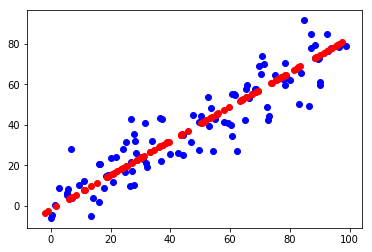

In [36]:
plt.scatter(X[:,0], X[:,1], color='b')
plt.scatter(X_restors[:,0], X_restors[:,1], color='r')
plt.show()

### 使用真实数据集

In [37]:
from sklearn import datasets

In [38]:
digits = datasets.load_digits()

X = digits.data
y = digits.target

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [42]:
X_train.shape

(1437, 64)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
knn_clf.score(X_test, y_test)

0.9888888888888889

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [53]:
%%time
knn2_clf = KNeighborsClassifier()
knn2_clf.fit(X_train_reduction, y_train)

Wall time: 4 ms


In [54]:
knn2_clf.score(X_test_reduction,y_test)

0.6055555555555555

In [55]:
pca.explained_variance_ratio_

array([0.1450646 , 0.13714246])

In [57]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [58]:
pca.explained_variance_ratio_

array([1.45064600e-01, 1.37142456e-01, 1.19680004e-01, 8.43768923e-02,
       5.87005941e-02, 5.01797333e-02, 4.34065700e-02, 3.61375740e-02,
       3.39661991e-02, 3.00599249e-02, 2.38906921e-02, 2.29417581e-02,
       1.81335935e-02, 1.78403959e-02, 1.47411385e-02, 1.41290045e-02,
       1.29333094e-02, 1.25283166e-02, 1.01123057e-02, 9.08986879e-03,
       8.98365069e-03, 7.72299807e-03, 7.62541166e-03, 7.09954951e-03,
       6.96433125e-03, 5.84665284e-03, 5.77225779e-03, 5.07732970e-03,
       4.84364707e-03, 4.34595748e-03, 3.73352381e-03, 3.57655938e-03,
       3.30727680e-03, 3.18129431e-03, 3.06969704e-03, 2.89170006e-03,
       2.51205204e-03, 2.27743660e-03, 2.22760483e-03, 2.00065017e-03,
       1.89529684e-03, 1.56877138e-03, 1.42740894e-03, 1.39115781e-03,
       1.20896097e-03, 1.10149976e-03, 9.81702199e-04, 8.82376601e-04,
       5.69898729e-04, 4.10322729e-04, 2.32125043e-04, 8.49807543e-05,
       5.37426557e-05, 5.27990816e-05, 1.03398093e-05, 6.20749843e-06,
      

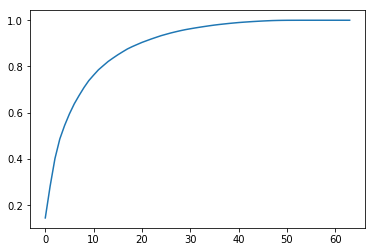

In [60]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [61]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca.explained_variance_ratio_

array([0.1450646 , 0.13714246, 0.11968   , 0.08437689, 0.05870059,
       0.05017973, 0.04340657, 0.03613757, 0.0339662 , 0.03005992,
       0.02389069, 0.02294176, 0.01813359, 0.0178404 , 0.01474114,
       0.014129  , 0.01293331, 0.01252832, 0.01011231, 0.00908987,
       0.00898365, 0.007723  , 0.00762541, 0.00709955, 0.00696433,
       0.00584665, 0.00577226, 0.00507733])

In [63]:
pca.n_components_

28

In [64]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [66]:
knn3_clf = KNeighborsClassifier()
knn3_clf.fit(X_train_reduction, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
knn3_clf.score(X_test_reduction,y_test)

0.9833333333333333

### 降维可视化

In [68]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

In [69]:
X_reduction.shape

(1797, 2)

In [75]:
X_reduction[:10,:]

array([[ -1.25946698,  21.27488316],
       [  7.95761113, -20.76869914],
       [  6.99192344,  -9.95598594],
       [-15.90610539,   3.332464  ],
       [ 23.30686736,   4.26906102],
       [-14.08708653,   7.91444857],
       [ 21.36340954,   5.28834006],
       [ -2.95260642, -21.07166352],
       [ -5.2551347 ,   1.1833597 ],
       [ -5.48019958,   8.07632485]])

In [76]:
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
y==0

array([ True, False, False, ..., False, False, False])

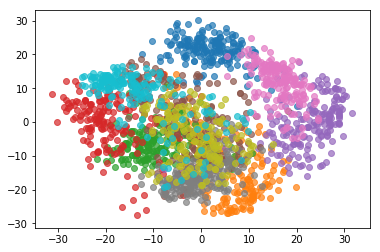

In [78]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.7)
plt.show()